In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
wvs = pd.read_csv('../data/wvs_model.csv')

# EDA and Visualizations

First I'll take a quick look at a heatmap to see how the other variables correlate with my target variable

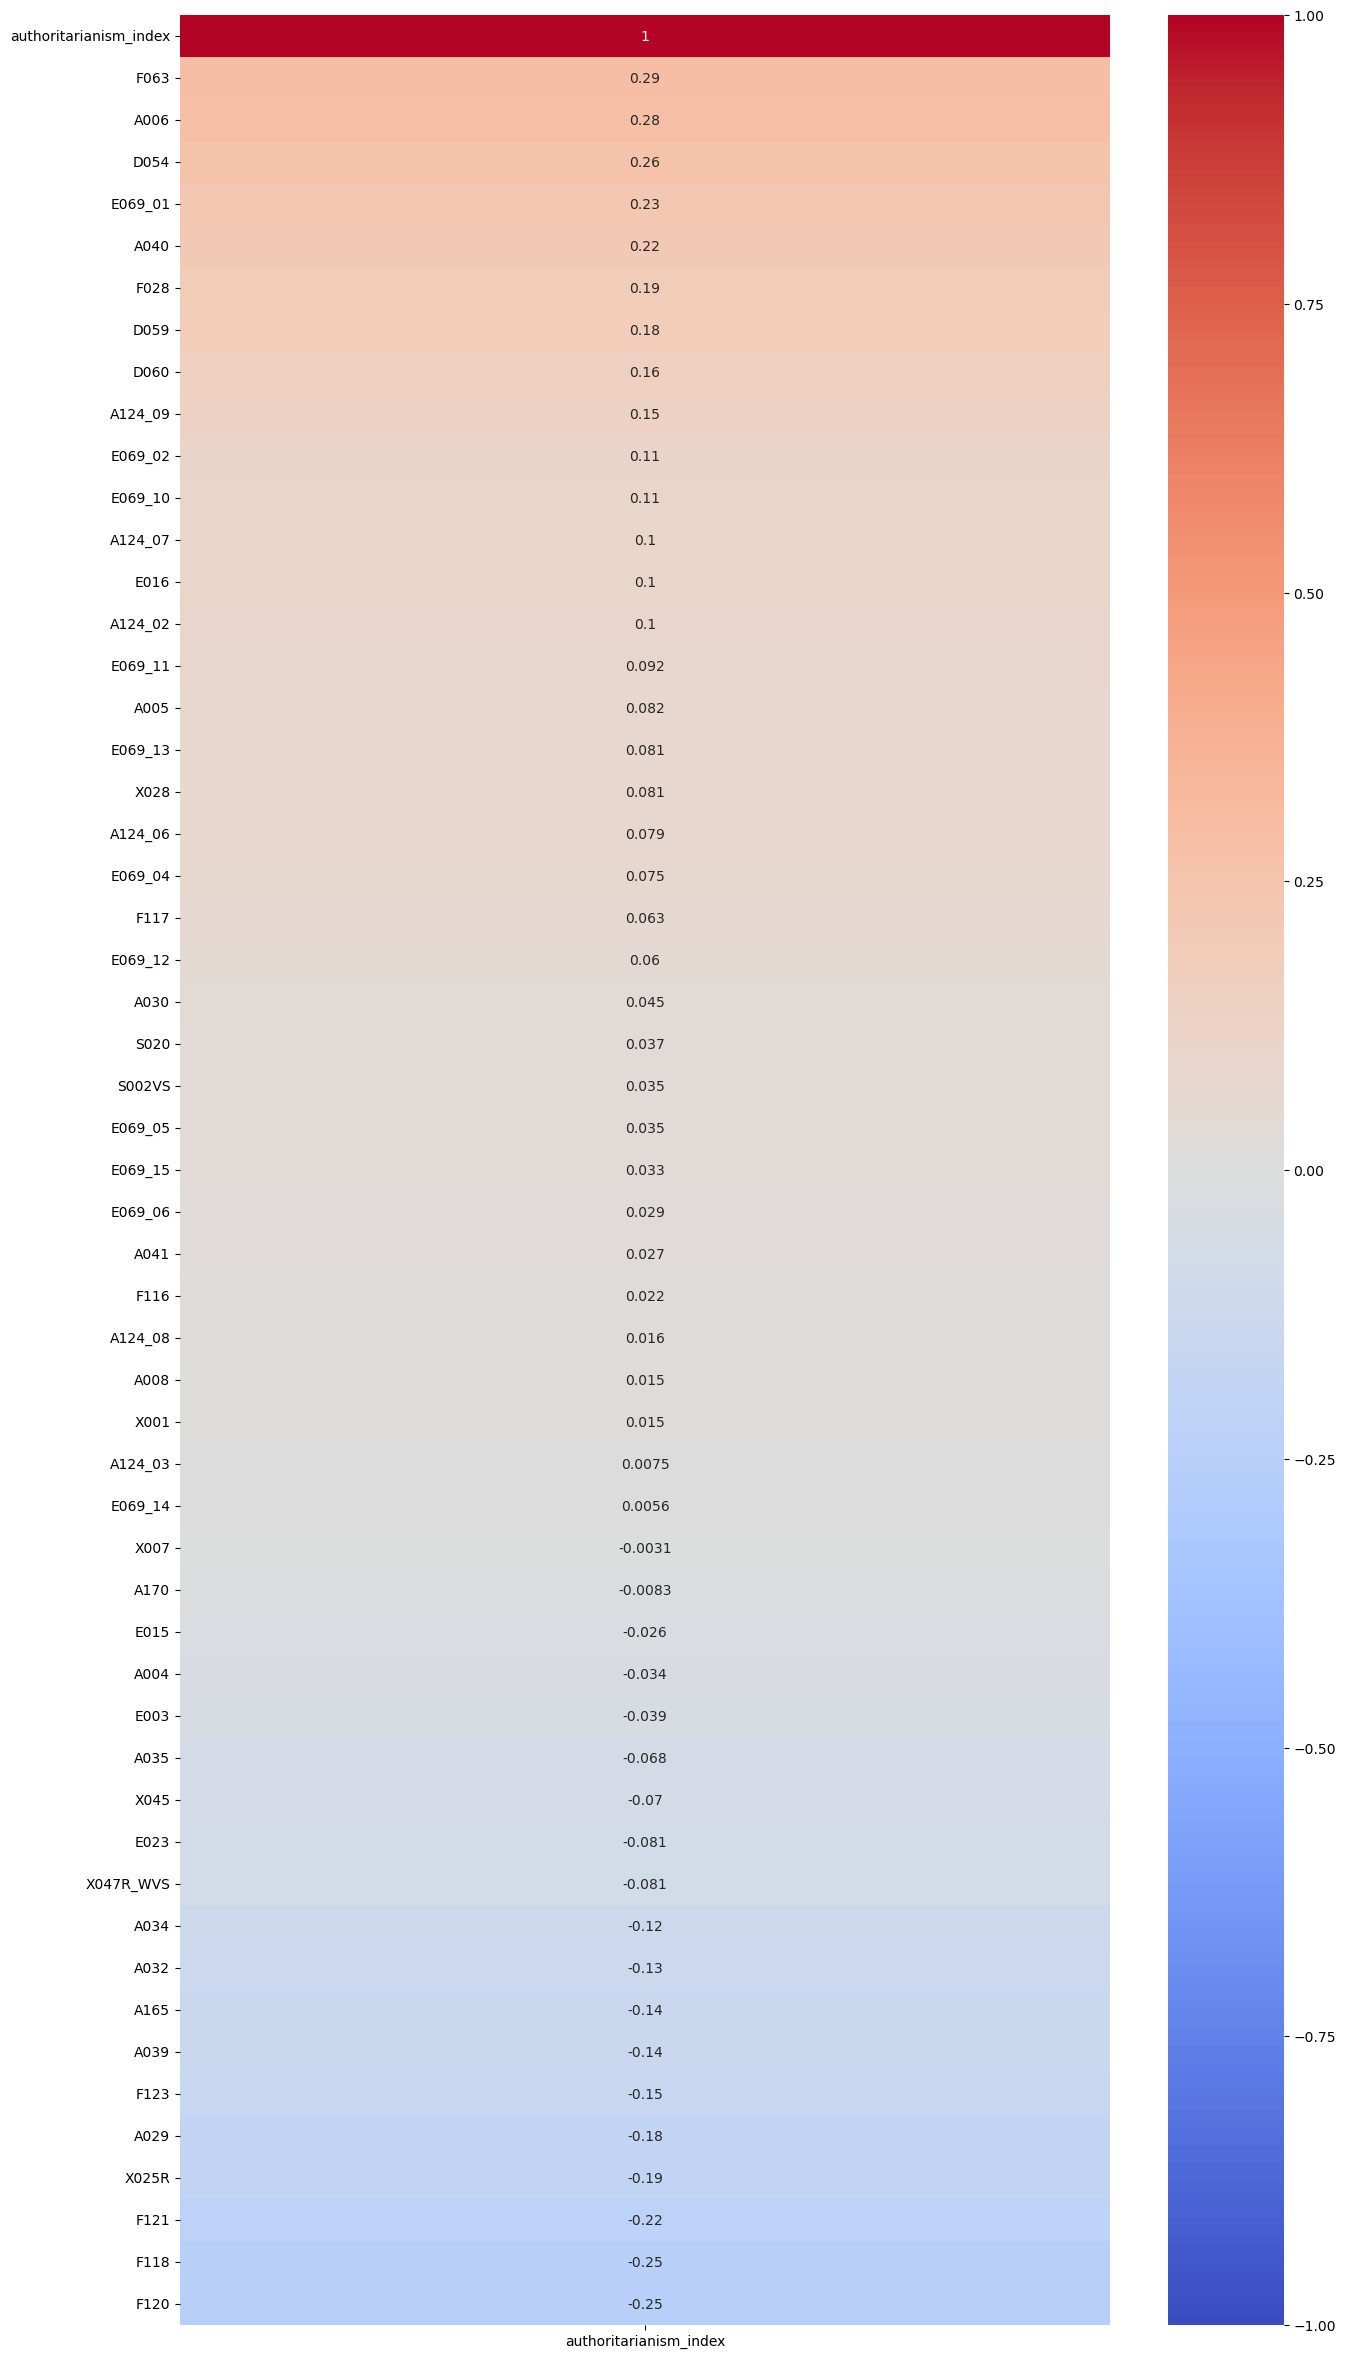

In [5]:
plt.figure(figsize = (15, 30))
sns.heatmap(wvs.corr(numeric_only=True)[['authoritarianism_index']].sort_values(by='authoritarianism_index', ascending = False),
           annot = True,
           vmin = -1,
           vmax = 1,
           cmap = 'coolwarm');

I'm not seeing very strong correlations here, but there are some that I would call *significant*, which for these purposes I'll define as more than 0.25 away from 0 in either direction. As a reminder, here is the text of the questions that fit that description:

| Question ID | Question Description |
|---|---|
| F063 | "How important is God in your life?" |
| A006 | "For each of the following aspects, indicate how important it is in your life" (**Religion**) |
| D054 | "One of my main goals in life has been to make my parents proud" |
| F120 | "Please tell me for each of the following actions whether you think it can always be justified, never be justified, or something in between" (**Abortion**) |
| F118 | "Please tell me for each of the following actions whether you think it can always be justified, never be justified, or something in between" (**Homosexuality**) |

## Tableau Visualizations

I did a significant amount of my data exploration in Tableau. Here are some of the visualizations I created:

In [7]:
%%html
<div class='tableauPlaceholder' id='viz1681738640746' style='position: relative'><noscript><a href='#'><img alt='Countries Included in the World Values Survey ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;2P&#47;2PH8G4Y9R&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;2PH8G4Y9R' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;2P&#47;2PH8G4Y9R&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681738640746');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

That's pretty good coverage overall, although I do notice a lot of blank space in Africa. My understanding from research I've done on my own is that conducting social science research in Africa is particularly difficult. The World Values Survey made special note of their efforts to improve their coverage in Africa over the years, and their are many more African countries involved in later waves of the survey than earlier

*https://www.worldvaluessurvey.org/wvs.jsp*

In [8]:
%%html
<div class='tableauPlaceholder' id='viz1681739628507' style='position: relative'><noscript><a href='#'><img alt='Average Authoritarianism Index by Year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYear&#47;AverageAuthoritarianismIndexbyYear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYear&#47;AverageAuthoritarianismIndexbyYear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYear&#47;AverageAuthoritarianismIndexbyYear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681739628507');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

It's hard to detect an overall trend here, although perhaps if you squint you can see a declining trend from a peak in 2003. The jumpiness of the data from year to year was one of my big concerns. It would be hard for their to be a year to year relationship when the component data making up the year to year aggregate is from completely different countries each year

In [9]:
%%html
<div class='tableauPlaceholder' id='viz1681741812933' style='position: relative'><noscript><a href='#'><img alt='Average Authoritarianism Index by Year by Region ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYearbyRegion&#47;AverageAuthoritarianismIndexbyYearbyRegion&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYearbyRegion&#47;AverageAuthoritarianismIndexbyYearbyRegion' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone-PredictingAuthoritarianism-SupportforAuthoritarianismbyYearbyRegion&#47;AverageAuthoritarianismIndexbyYearbyRegion&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681741812933');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

When I break the annual time series data down by region, I come across a fatal flaw. Within each region there are a lot of missing annual datapoints. Between this missing regional data and the issues I mentioned above regarding the way the overall time series data is constructed, I've come to the unfortunate conclusion that I will have to abandon the time series portion of the project, and focus instead on the classification model

In [6]:
%%html
<div class='tableauPlaceholder' id='viz1681738363621' style='position: relative'><noscript><a href='#'><img alt='Average Support for Authoritarianism by Country ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G6&#47;G67MQ5K6W&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;G67MQ5K6W' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G6&#47;G67MQ5K6W&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681738363621');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here I took a look at the Authoritarianism Index divided by country, and found some interesting results. It looks like authoritarian sentiment is particularly prevalent in Latin America and the Middle East. Perhaps this is not surprising given the history of strong men leaders in both regions. Some of the more surprising results were strong support for authoritarian sentiment in India, and weak support in China and Russia